# Python para Economistas - Clase 3

**Plan de clase:**  
**(1)** GitHub para entregar tarea \
**(2)** Repaso de `Pandas` \
**(3)** `Pandas`: temas nuevos \
**(4)** `Matplotlib` \
**(5)** Ejercicios

___
## (1) GitHub

A partir de esta clase, **los trabajos prácticos se entregarán a través de GitHub** (ya no a través de Slack).\
Supondremos que ya tienen una cuenta personal de GitHub. Vamos a ver:


 **(a)** Cómo crear un repo privado: https://docs.github.com/en/get-started/quickstart/create-a-repo  
 **(b)** Cómo agregar colaboradores: https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository  
 **(c)** Clonar repo en computadora  
 **(d)** Comandos nuevos: `status`, `add`, `commit` y `push`  
 
 _Si es necesario: https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token_

Los nombres de usuario de GitHub de los profesores están en el notebook correspondiente al trabajo práctico.

___

**_Recordatorio:_**
Como siempre, para seguir esta clase, pueden ejecutar `git pull` para bajarse este notebook. Recuerden guardar los cambios en los archivos del repositorio que hayan modificado (y que quieran preservar) con "Save as...", luego ejecutar `git reset --hard` para volver los archivos al estado original y así evitar conflictos al hacer el pull.

___
## (2) Repaso de Pandas
Vamos a trabajar sobre un archivo CSV que contiene una serie temporal con la potencia de distintas centrales eléctricas de Argentina.

- abrir archivos
- inspeccionar los datos
- crear columnas
- seleccionar y dropear columnas
- seleccionar segmentos de una base (filtrar, slice, loc)

**(a)** cargar los datos en el archivo `potencia_instalada_mod.csv`. (_Nota: van a tener que definir el parámetro_ `encoding='latin1'`_)_  
**(b)** identificar cuántas columnas y filas hay, cantidades según tipo de dato y si alguna tiene valores faltantes.  
**(c)** inspeccionemos las primeras 5 líneas: ¿qué problema ven?  
**(d)** armar un dataframe llamado `df` que tenga las siguientes columnas: periodo, el agente, la descripcion del agente, la fuente de generación y la potencia instalada.  
**(e)** redondear la columna de potencia instalada al _entero más cercano_.  
**(f)** cambiar el formato de la columna de potencia instalada a `int`. \
**(g)** cortar la base para quedarnos únicamente con las primeras 11497 filas

**(a)** Leemos los datos en un Dataframe

In [13]:
import pandas as pd

In [75]:
potencia_df = pd.read_csv("potencia_instalada_mod.csv", encoding='latin1', sep="|")

In [76]:
potencia_df.shape

(15793, 16)

**_Nota para curiosos_**: la razón por la que necesitamos `encoding='latin1'` es que hay caracteres que no se pueden leer con el encoding por defecto (un encoding es una forma de interpretar los bytes como caracteres, por ejemplo UTF-8). De hecho, si tratamos de leer sin este argumento nos dice que nos encontramos un error en el byte 288. Esto significa que el carácter en la posición 288 no puede ser decodificado. Si nos da curiosidad, podemos usar el siguiente código para ver qué carácter es:

In [94]:
texto = open("potencia_instalada_mod.csv", "rt", encoding="latin1").read()
texto[:1000]

'Unnamed: 0|id|periodo|central|agente|agente_descripcion|region|categoria_region|tipo_maquina|fuente_generacion|tecnologia|potencia_instalada_mw|fecha_proceso|lote_id_log|mes|indice_tiempo\n0|2|01/10/2015 0:00|ABRO|CTBROWNG|C.T. ALMIRANTE BROWN|GRAN BS.AS.|Gba - Litoral - Buenos Aires|DI|Térmica|Motor Diesel|25.0|47:17.9|4|10|2015-10\n1|3|01/10/2015 0:00|ACAJ|CAPEXSAG|C.T. AGUA DEL CAJON|COMAHUE|Comahue|TG|Térmica|Ciclos Combinados|184.4|47:17.9|4|10|2015-10\n2|4|01/10/2015 0:00|ADTOHI|HIDIAMAG|H. DIAMANTE SA|CUYO|Cuyo|HI|Hidráulica|Hidráulica|150.0|47:17.9|4|10|2015-10\n3|5|01/10/2015 0:00|AESP|CTAESPAG|C.T. AES PARANA|BUENOS AIRES|Gba - Litoral - Buenos Aires|TG|Térmica|Ciclos Combinados|525.96|47:17.9|4|10|2015-10\n4|6|01/10/2015 0:00|AESP|CTAESPAG|C.T. AES PARANA|BUENOS AIRES|Gba - Litoral - Buenos Aires|TV|Térmica|Ciclos Combinados|319.3|47:17.9|4|10|2015-10\n5|7|01/10/2015 0:00|ALEM|CTALEMAG|CT ALEM - AGGREKO|NORESTE|Nea|DI|Térmica|Motor Diesel|15.0|47:17.9|4|10|2015-10\n6|8|01/1

`.read()` lee el contenido del archivo como una única string, y luego podemos usar `[288]` para ver qué carácter hay en esa posición:

In [95]:
texto[288]

'é'

Vemos que el carácter problemático es la é (e con acento). En realidad este es el primer carácter problemático que encuentra: el resto de vocales con acento también lo son.

**_Fin de nota para curiosos_**

**(b)** identificar cuántas columnas y filas hay, cantidades según tipo de dato y si alguna tiene valores faltantes.  

In [96]:
potencia_df.dtypes
potencia_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15793 entries, 0 to 15792
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15793 non-null  int64  
 1   id                     15793 non-null  int64  
 2   periodo                15793 non-null  object 
 3   central                15793 non-null  object 
 4   agente                 15789 non-null  object 
 5   agente_descripcion     15789 non-null  object 
 6   region                 15793 non-null  object 
 7   categoria_region       15793 non-null  object 
 8   tipo_maquina           15793 non-null  object 
 9   fuente_generacion      15793 non-null  object 
 10  tecnologia             15793 non-null  object 
 11  potencia_instalada_mw  15793 non-null  float64
 12  fecha_proceso          15793 non-null  object 
 13  lote_id_log            15793 non-null  int64  
 14  mes                    15793 non-null  int64  
 15  in

**(c)** inspeccionemos las primeras 5 líneas: ¿qué problema ven?  

In [98]:
potencia_df.head(5)

,Unnamed: 0,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo
0,0,2,01/10/2015 0:00,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,47:17.9,4,10,2015-10
1,1,3,01/10/2015 0:00,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,47:17.9,4,10,2015-10
2,2,4,01/10/2015 0:00,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,47:17.9,4,10,2015-10
3,3,5,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,47:17.9,4,10,2015-10
4,4,6,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,47:17.9,4,10,2015-10


Pueden haber encontrado más de un problema, aquí nos enfocaremos en la columna `"Unnamed: 0"` que parece contener un índice y haber sido guardada por error.

Con `drop` (usando el argumento `axis=1`) podemos eliminar columnas:

In [100]:
potencia_df = potencia_df.drop("Unnamed: 0", axis=1).head(5)

KeyError: "['Unnamed: 0'] not found in axis"

In [101]:
potencia_df

,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo
0,2,01/10/2015 0:00,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,47:17.9,4,10,2015-10
1,3,01/10/2015 0:00,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,47:17.9,4,10,2015-10
2,4,01/10/2015 0:00,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,47:17.9,4,10,2015-10
3,5,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,47:17.9,4,10,2015-10
4,6,01/10/2015 0:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,47:17.9,4,10,2015-10


**(d)** armar un dataframe llamado `df` que tenga las siguientes columnas: periodo, el agente, la descripcion del agente, la fuente de generación y la potencia instalada.  

Creamos una lista con las columnas a conservar:

In [20]:
columnas_deseadas = ["periodo", "agente", "agente_descripcion", "fuente_generacion", "potencia_instalada_mw"]

In [22]:
df = potencia_df[columnas_deseadas]

**(e)** redondear la columna de potencia instalada al _entero más cercano_.  
**(f)** cambiar el formato de la columna de potencia instalada a `int`.

Redondeamos con `.round`:

In [74]:
df.potencia_instalada_mw = df.potencia_instalada_mw.round()
# df.potencia_instalada_mw = round(df.potencia_instalada_mw) # también funciona
# df.potencia_instalada_mw = df.potencia_instalada_mw.apply(int) # esta solución trunca, no redondea!

Casteamos con `astype`:

In [ ]:
df.potencia_instalada_mw = df.potencia_instalada_mw.astype(int)

Confirmemos que el tipo de dato es correcto:

In [15]:
df.potencia_instalada_mw.dtype

dtype('int64')

**(g)** cortar la base para quedarnos únicamente con las primeras 11497 filas

In [66]:
N = 11497
# para esta solución usamos el hecho de que los indices son los enteros de 0 a N-1 (no siempre va a ser el caso)
df.loc[:N-1]
# lo mismo para la siguiente solución, que utiliza indexado con booleanos
df[df.index < N]


# por otra parte, estas soluciones son siempre válidas
df.iloc[:N]
df = df.head(N)

In [67]:
df.tail()

,periodo,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,,
11492,01/04/2019 0:00,CTENSENG,BIOGAS RS CT ENSENADA SECCO,Renovable,5
11493,01/04/2019 0:00,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,Renovable,6
11494,01/04/2019 0:00,PSTINO2G,PQUE SOLAR TINOGASTA II,Renovable,7
11495,01/04/2019 0:00,PEBICE2G,P.EOLICO BICENTENARIO 2,Renovable,25
11496,01/04/2019 0:00,PEBANDEG,P.EOLICO LA BANDERITA,Renovable,40


___

_Recreo_

___
## (3) Pandas: temas nuevos

### Operaciones a nivel de grupos

Si queremos agrupar nuestras filas de acuerdo al valor de alguna columna, debemos usar el método `.groupby()`. 
Usemos esto para calcular:
1) la potencia total instalada en el primer período, para cada tipo de fuente de energía.
2) la potencia total instalada para cada período, para cada tipo de energía.

1. **Resolución**:

In [65]:
primer_periodo_df = df[df.periodo == df.periodo[0]]

Dado que la columna periodo tiene siempre el mismo valor, la podemos quitar del Dataframe

In [67]:
primer_periodo_df.drop("periodo", axis=1, inplace=True)

/tmp/ipykernel_26009/467282448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primer_periodo_df.drop("periodo", axis=1, inplace=True)


Examinemos cuáles son los valores posible de la columna `fuente_generacion`. Casteando la columna a `set`, nos devuelve un set donde cada elemento aparece una vez:

In [71]:
set(primer_periodo_df.fuente_generacion)

{'Hidráulica', 'Nuclear', 'Renovable', 'Térmica'}

También podemos hacer algo similar con `.unique`:

In [50]:
primer_periodo_df.fuente_generacion.unique()

array(['Térmica', 'Hidráulica', 'Renovable', 'Nuclear'], dtype=object)

In [73]:
primer_periodo_df.head()

,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,
0,CTBROWNG,C.T. ALMIRANTE BROWN,Térmica,25
1,CAPEXSAG,C.T. AGUA DEL CAJON,Térmica,184
2,HIDIAMAG,H. DIAMANTE SA,Hidráulica,150
3,CTAESPAG,C.T. AES PARANA,Térmica,526
4,CTAESPAG,C.T. AES PARANA,Térmica,319


In [74]:
primer_periodo_df.groupby(by="fuente_generacion").agg({"potencia_instalada_mw": "sum"})

,potencia_instalada_mw
fuente_generacion,
Hidráulica,11106
Nuclear,1730
Renovable,213
Térmica,20276


In [78]:
primer_periodo_df.groupby(by="fuente_generacion").agg({"potencia_instalada_mw": "count"}).rename({"potencia_instalada_mw": "n"}, axis=1)

,n
fuente_generacion,
Hidráulica,56
Nuclear,3
Renovable,16
Térmica,207


In [79]:
primer_periodo_df.groupby(by="fuente_generacion").agg({"potencia_instalada_mw": "mean"}).rename({"potencia_instalada_mw": "potencia_media_mw"}, axis=1)

,potencia_media_mw
fuente_generacion,
Hidráulica,198.321429
Nuclear,576.666667
Renovable,13.312500
Térmica,97.951691


In [82]:
df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})

potencia_instalada_mw
periodo         fuente_generacion                       
01/01/2016 0:00 Hidráulica                         11106
                Nuclear                             1755
                Renovable                            213
                Térmica                            20554
01/01/2017 0:00 Hidráulica                         10681
...                                                  ...
01/12/2016 0:00 Térmica                            20766
01/12/2017 0:00 Hidráulica                         10745
                Nuclear                             1755
                Renovable                            751
                Térmica                            22897

[152 rows x 1 columns]

2. **Resolución:** Podríamos hacerlo repitiendo iterativamente el procedimiento para el primer período (solución propuesta en clase):

In [51]:
lista_dfs = []
for periodo in df.periodo.unique(): 
    df_por_periodo = df[df.periodo == periodo].groupby("fuente_generacion").aggregate({"potencia_instalada_mw": "sum"})
    df_por_periodo["periodo"] = periodo
    lista_dfs.append(df_por_periodo)

Esto nos da una lista donde cada elemento es un Dataframe para un período:

In [57]:
lista_dfs[0]

,potencia_instalada_mw,periodo
fuente_generacion,,
Hidráulica,11106,01/10/2015 0:00
Nuclear,1730,01/10/2015 0:00
Renovable,213,01/10/2015 0:00
Térmica,20276,01/10/2015 0:00


In [60]:
lista_dfs[1]

,potencia_instalada_mw,periodo
fuente_generacion,,
Hidráulica,11106,01/11/2015 0:00
Nuclear,1730,01/11/2015 0:00
Renovable,213,01/11/2015 0:00
Térmica,20289,01/11/2015 0:00


Esta lista se puede luego concatenar para dar un único Dataframe (esto usa `pd.concat` lo cual vemos en la siguiente sección)

In [61]:
pd.concat(lista_dfs)

,potencia_instalada_mw,periodo
fuente_generacion,,
Hidráulica,11106,01/10/2015 0:00
Nuclear,1730,01/10/2015 0:00
Renovable,213,01/10/2015 0:00
Térmica,20276,01/10/2015 0:00
Hidráulica,11106,01/11/2015 0:00
...,...,...
Térmica,24530,01/01/2019 0:00
Hidráulica,10789,01/04/2019 0:00
Nuclear,1755,01/04/2019 0:00


**Resolución con `.groupby` (preferida)**

Sin embargo, `.groupby` nos permite hacerlo de una manera más compacta. La idea es simplemente agrupar por dos columnas (`periodo` y `fuente_generacion`) en lugar de una sola:

In [86]:
df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})

potencia_instalada_mw
periodo    fuente_generacion                       
2015-10-01 Hidráulica                         11106
           Nuclear                             1730
           Renovable                            213
           Térmica                            20276
2015-11-01 Hidráulica                         11106
...                                             ...
2019-01-01 Térmica                            24530
2019-04-01 Hidráulica                         10789
           Nuclear                             1755
           Renovable                           1802
           Térmica                            24557

[152 rows x 1 columns]

___

### Unir dataframes

Para unir dataframes, utilizamos los métodos `.append()` y `.merge()`. Para ejemplificar su uso, hagamos entre todos lo siguientes ejercicios:
 1) Extraer los datos correspondientes al primer período y al último período, en dos Dataframes. Luego, unir los dos Dataframes con `.concat()`.
 2) Tomar el DataFrame creado en el punto anterior, donde para cada período y fuente calculamos la potencia total correspondiente. Agregar como columna, para todas las filas, la potencia instala en el primer período para la fuente de energía correspondiente, llamándola `pot_1er_periodo`. Luego, calcular la diferencia entre la potencia instalada y la correspondiente al primer período, y agregarlo como una nueva columna, `diferencia`. 

1. **Resolución**: primero extraemos un subconjunto de las filas, correspondientes al primer período. Estamos usando el hecho de que las filas ya vienen ordenadas por período, con lo cual basta usar el índice 0.

In [18]:
primer_periodo_df = df[df.periodo == df.periodo[0]]

Luego, extraemos las filas para el último período:

In [19]:
# Dos formas equivalentes
ultimo_periodo_df = df[df.periodo == df.periodo[len(df)-1]]
ultimo_periodo_df = df[df.periodo == df.periodo.iloc[-1]]

# Esta no funcionaría, ¿por qué?
# ultimo_periodo_df = df[df.periodo == df.periodo.loc[-1]]

Finalmente, concatenamos con `pd.concat`

In [20]:
pd.concat([primer_periodo_df, ultimo_periodo_df])

,periodo,agente,agente_descripcion,fuente_generacion,potencia_instalada_mw
indice,,,,,
0,01/10/2015 0:00,CTBROWNG,C.T. ALMIRANTE BROWN,Térmica,25
1,01/10/2015 0:00,CAPEXSAG,C.T. AGUA DEL CAJON,Térmica,184
2,01/10/2015 0:00,HIDIAMAG,H. DIAMANTE SA,Hidráulica,150
3,01/10/2015 0:00,CTAESPAG,C.T. AES PARANA,Térmica,526
4,01/10/2015 0:00,CTAESPAG,C.T. AES PARANA,Térmica,319
...,...,...,...,...,...
11492,01/04/2019 0:00,CTENSENG,BIOGAS RS CT ENSENADA SECCO,Renovable,5
11493,01/04/2019 0:00,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,Renovable,6
11494,01/04/2019 0:00,PSTINO2G,PQUE SOLAR TINOGASTA II,Renovable,7


2. **Resolución:** primero, calculemos la potencia por fuente, para el primer período, como hicimos antes.

In [41]:
pot_1er_periodo_df = primer_periodo_df.groupby(by="fuente_generacion").agg({'potencia_instalada_mw': 'sum'})
pot_1er_periodo_df.rename({"potencia_instalada_mw": "pot_1er_periodo"}, axis=1, inplace=True)
pot_1er_periodo_df.head()

,pot_1er_periodo
fuente_generacion,
Hidráulica,11106
Nuclear,1730
Renovable,213
Térmica,20276


Reiniciamos el índice, para que de esa manera la fuente de generación pase a ser una columna en lugar del índice:

In [42]:
pot_1er_periodo_df = pot_1er_periodo_df.reset_index()
pot_1er_periodo_df.head()

,fuente_generacion,pot_1er_periodo
0,Hidráulica,11106
1,Nuclear,1730
2,Renovable,213
3,Térmica,20276


Hacemos lo mismo, para todos los períodos. Como antes, agrupamos por las columnas `periodo` y `fuente_generacion`

In [43]:
pot_todos_los_periodos_df = df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})
pot_todos_los_periodos_df = pot_todos_los_periodos_df.reset_index()
pot_todos_los_periodos_df.head()

,periodo,fuente_generacion,potencia_instalada_mw
0,01/01/2016 0:00,Hidráulica,11106
1,01/01/2016 0:00,Nuclear,1755
2,01/01/2016 0:00,Renovable,213
3,01/01/2016 0:00,Térmica,20554
4,01/01/2017 0:00,Hidráulica,10681


Ahora realizamos la unión de los dos Dataframes, con `pd.merge`.

In [44]:
pot_todos_los_periodos_df = pd.merge(pot_todos_los_periodos_df, pot_1er_periodo_df, on="fuente_generacion")
pot_todos_los_periodos_df.head()

,periodo,fuente_generacion,potencia_instalada_mw,pot_1er_periodo
0,01/01/2016 0:00,Hidráulica,11106,11106
1,01/01/2017 0:00,Hidráulica,10681,11106
2,01/01/2018 0:00,Hidráulica,10767,11106
3,01/01/2019 0:00,Hidráulica,10789,11106
4,01/02/2016 0:00,Hidráulica,11106,11106


Finalmente, calculamos la columna `diferencia` y mostramos el resultado:

In [45]:
pot_todos_los_periodos_df["diferencia"] = pot_todos_los_periodos_df.potencia_instalada_mw - pot_todos_los_periodos_df.pot_1er_periodo

In [48]:
pot_todos_los_periodos_df.head()

,periodo,fuente_generacion,potencia_instalada_mw,pot_1er_periodo,diferencia
0,01/01/2016 0:00,Hidráulica,11106,11106,0
1,01/01/2017 0:00,Hidráulica,10681,11106,-425
2,01/01/2018 0:00,Hidráulica,10767,11106,-339
3,01/01/2019 0:00,Hidráulica,10789,11106,-317
4,01/02/2016 0:00,Hidráulica,11106,11106,0


___
## (4) Matplotlib

Para instalar `matplotlib` (no viene con Python por defecto), pueden usar `conda` o `pip`:

     conda install matplotlib -c anaconda

o
    `pip install matplotlib`
    

Ver la [Galería de Matplotlib](https://matplotlib.org/stable/gallery/index.html)

In [203]:
import matplotlib.pyplot as plt

In [204]:
# la siguiente linea de código hace que los gráficos se muestren en el mismo notebook (y no en una ventana nueva)
%matplotlib inline
# es una configuración de jupyter notebook

In [205]:
import numpy as np

In [209]:
y = np.random.randn(10)

In [210]:
y

array([-0.74397233,  1.03051202,  1.07512997,  2.15463568, -0.06688065,
       -0.6794682 ,  0.92529677, -0.13952405,  2.07373585, -0.83894106])

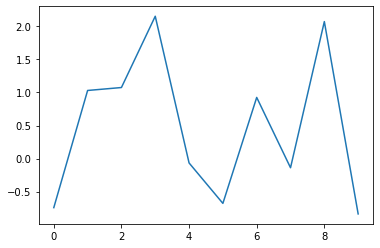

In [211]:
plt.plot(y)
plt.show()

In [214]:
x = np.random.rand(10)
x.sort()

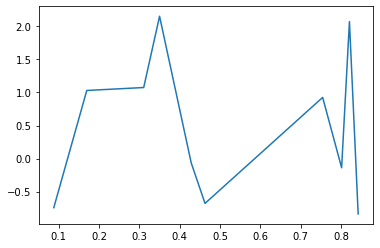

In [215]:
plt.plot(x, y)
plt.show()

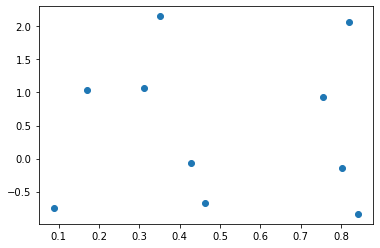

In [216]:
plt.scatter(x, y)
plt.show()

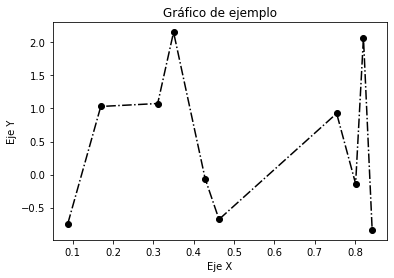

In [228]:
plt.plot(x, y, marker="o", color="k", linestyle="-.")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de ejemplo")
plt.show()

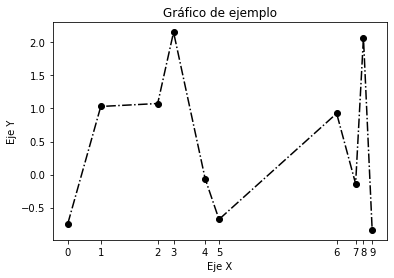

In [233]:
plt.plot(x, y, marker="o", color="k", linestyle="-.")
plt.xticks(ticks=x, labels=range(10))
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de ejemplo")
plt.show()

### Preparamos los datos para graficar

In [1]:
# Volvemos a correr el código de más arriba
import pandas as pd
potencia_df = pd.read_csv("potencia_instalada_mod.csv", encoding='latin1', sep="|", index_col="Unnamed: 0")
potencia_df.index.name = "indice"
columnas_deseadas = ["periodo", "agente", "agente_descripcion", "fuente_generacion", "potencia_instalada_mw"]
df = potencia_df[columnas_deseadas]
df.potencia_instalada_mw = round(df["potencia_instalada_mw"]).astype(int)
df = df.head(11497)

/tmp/ipykernel_25712/3036890287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.potencia_instalada_mw = round(df["potencia_instalada_mw"]).astype(int)


In [2]:
# Volvemos a generar el dataframe agrupado por periodo/fuente
df_fuente = df.groupby(by=["periodo", "fuente_generacion"]).agg({'potencia_instalada_mw': 'sum'})
df_fuente = df_fuente.reset_index()
df_fuente.head()

,periodo,fuente_generacion,potencia_instalada_mw
0,01/01/2016 0:00,Hidráulica,11106
1,01/01/2016 0:00,Nuclear,1755
2,01/01/2016 0:00,Renovable,213
3,01/01/2016 0:00,Térmica,20554
4,01/01/2017 0:00,Hidráulica,10681


Veamos esta columna de tiempo

In [3]:
df_fuente['periodo']

0      01/01/2016 0:00
1      01/01/2016 0:00
2      01/01/2016 0:00
3      01/01/2016 0:00
4      01/01/2017 0:00
            ...       
147    01/12/2016 0:00
148    01/12/2017 0:00
149    01/12/2017 0:00
150    01/12/2017 0:00
151    01/12/2017 0:00
Name: periodo, Length: 152, dtype: object

Para cambiar de `str` a `datetime` podemos usar nuevamente `pd.to_datetime`. Para especificar formato ver: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [4]:
pd.to_datetime(df_fuente['periodo'], format="%d/%m/%Y %H:%M")

0     2016-01-01
1     2016-01-01
2     2016-01-01
3     2016-01-01
4     2017-01-01
         ...    
147   2016-12-01
148   2017-12-01
149   2017-12-01
150   2017-12-01
151   2017-12-01
Name: periodo, Length: 152, dtype: datetime64[ns]

Para transformar y realizar operaciones sobre datos de tiempo podemos usar la librería datetime.

In [5]:
pd.to_datetime(df_fuente['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m")

0      2016-01
1      2016-01
2      2016-01
3      2016-01
4      2017-01
        ...   
147    2016-12
148    2017-12
149    2017-12
150    2017-12
151    2017-12
Name: periodo, Length: 152, dtype: object

In [6]:
df_fuente['periodo'] = pd.to_datetime(
    df_fuente['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m")

In [7]:
df_fuente.sort_values(by='periodo', ascending=True, inplace=True)

In [8]:
# defino vectores de datos para serie 1
y1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["potencia_instalada_mw"]
x1 = df_fuente[df_fuente["fuente_generacion"]=="Renovable"]["periodo"]
# defino vectores de datos para serie 2
y2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["potencia_instalada_mw"]
x2 = df_fuente[df_fuente["fuente_generacion"]=="Térmica"]["periodo"]

### Matplotlib: ejercicio

Practiquemos Matplotlib! Usando los vectores que acabamos de definir, construyamos un gráfico de linea con dos series: una graficando la evolución de producción energética de fuente renovable y otra de fuente térmica. El gráfico debe contener:
- serie con datos de fuente renovable
- serie con datos de fuente térmica
- los ejes deben tener títulos
- el gráfico debe tener título
- rotar los ticks del eje x para que estén verticales
- usar distintos colores para cada tipo de fuente, e incluir una leyenda describiendo éstos

### Ejemplo

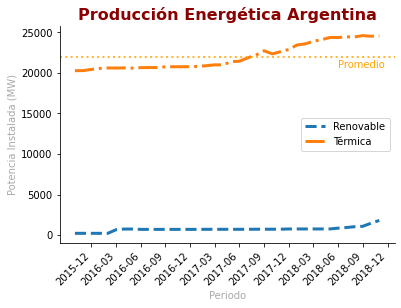

In [65]:
# creo el grafico
plt.plot(x1,y1, label='Renovable', linestyle='--', linewidth=3) # serie 1
plt.plot(x2, y2, label='Térmica', linestyle='-.', linewidth=3) # serie 2 sobre mismos ejes

# modifico labels
plt.xlabel('Periodo',color='darkgrey')
plt.ylabel('Potencia Instalada (MW)',color='darkgrey')


tick_list = [
    '2015-12',
    '2016-03','2016-06','2016-09','2016-12',
    '2017-03','2017-06','2017-09','2017-12',
    '2018-03','2018-06','2018-09','2018-12'
]
plt.xticks(tick_list, rotation=45, horizontalalignment="right")

# agregamos linea horizontal con potencia termica promedio
y2_promedio = y2.mean()
plt.axhline(y2_promedio,
    alpha=0.8, color='orange', 
    linestyle=':',linewidth=2)

# escribo sobre el gráfico
plt.annotate('Promedio', ('2018-06', y2_promedio-1400), color='orange')

# apagamos los "spines"
# plt.gca() trae las propiedades del current axes
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

plt.title("Producción Energética Argentina",
          fontdict={
              'size':16,
              'color': 'darkred',
              'weight': 'bold'
          })
# agrego leyenda
plt.legend()
plt.show() #esto es necesario para visualizar

Acá link a un post donde explica comandos simples para mejorar los gráficos:  
https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5